In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim import corpora, models, similarities
import os
import utility_synopsis


2017-02-17 20:14:04,673 : INFO : 'pattern' package not found; tag filters are not available for English


In [29]:
import math
import numpy as np
from scipy.spatial.distance import cosine

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#dir_path = 'movie_description/plot_summary'
#prefix = 'plot_summary'
dir_path = '/home/wsyj/dissertation__imdb/005_scrapy_hello/tutorial/tutorial/movie_description/synopsis'
prefix = 'synopsis'

In [85]:

id_filename_map = {}
id__item_id__map = {}
item_id__id__map = {}
id_list = []
for i, filename in enumerate(os.listdir(dir_path)):
    id_filename_map[i] = filename
    
    pieces = filename.split('-')
    assert(len(pieces[1]) > 0)
    item_id = pieces[1] # note: this is NUMBER 1, not character l
    id__item_id__map[i] = item_id
    item_id__id__map[item_id] = i
    
    id_list.append(i)
    
    

In [7]:

def open_file_and_collect_all_text(path, filename):
    #print filename
    f = open(os.path.join(path, filename), 'r')
    content = ''.join(f.readlines())
    #print content
    f.close()
    return content

In [8]:

# remove common words and tokenize
stoplist = set('for a an of the and to in'.split())


In [9]:


# memory-efficient dictionary construction <START>
from six import iteritems
# collect statistics about all tokens
#dictionary = corpora.Dictionary(line.lower().split() for line in open('mycorpus.txt'))
dictionary = corpora.Dictionary(open_file_and_collect_all_text(dir_path, filename).lower().split() for filename in os.listdir(dir_path))

# remove stop words and words that appear only once
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
            if stopword in dictionary.token2id]
once_ids = [tokenid for tokenid, docfreq in iteritems(dictionary.dfs) if docfreq == 1]
dictionary.filter_tokens(stop_ids + once_ids)  # remove stop words and words that appear only once
#dictionary.compactify()  # remove gaps in id sequence after words that were removed
dictionary.save('%s.dict' % (prefix))  # store the dictionary, for future reference
print(dictionary)
print(dictionary.token2id)
# <END>

2017-02-17 20:15:33,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-02-17 20:15:34,322 : INFO : built Dictionary(50170 unique tokens: [u'fawn', u'considered.', u'plane!"', u'circuitry', u'spiders']...) from 442 documents (total 556914 corpus positions)
2017-02-17 20:15:34,351 : INFO : saving Dictionary object under synopsis.dict, separately None
2017-02-17 20:15:34,364 : INFO : saved synopsis.dict


Dictionary(19590 unique tokens: [u'happens.', u'considered.', u'yellow', u'four', u'woods']...)
{u'happens.': 17985, u'considered.': 1, u'yellow': 3, u'four': 4, u'woods': 6, u'ocean,': 7, u'spiders': 8, u"friend's": 5, u'hanging': 10, u'screaming,': 11, u'screaming.': 12, u'comically': 13, u'gabrielle': 15, u'marching': 16, u'disobeying': 17, u'(natalie': 18, u'nazis,': 12040, u'eligible': 19, u'electricity': 20, u'wheeled': 22, u'1939.': 23, u'demoted': 25, u'lord': 26, u'immature': 27, u'innocence,': 28, u'starship.': 29, u'innocence.': 30, u'starship,': 31, u'sinking': 32, u'shielding': 35, u'(josh': 36, u'regional': 37, u'wood,': 38, u'advice.': 39, u'advice,': 40, u'replaces': 13027, u'foul': 42, u'fingers.': 43, u'uncertain': 6488, u'stabbed': 45, u'screaming': 340, u'writing.': 47, u'starships': 48, u'disturb': 50, u'grueling': 51, u'wooden': 53, u'stars.': 57, u"couple's": 58, u'stars,': 59, u'doll.': 16878, u'crotch': 60, u"burke's": 61, u'succession': 62, u'stereotypical': 6

In [10]:

# memory-efficient corpus construction <START>
class MyCorpus(object):
    def __iter__(self):
        #for line in open('mycorpus.txt'):
        #    # assume there's one document per line, tokens separated by whitespace
        #    yield dictionary.doc2bow(line.lower().split())
        for filename in os.listdir(dir_path):
            yield dictionary.doc2bow(open_file_and_collect_all_text(dir_path, filename).lower().split())

corpus_memory_friendly = MyCorpus()  # doesn't load the corpus into memory!
print(corpus_memory_friendly)
corpora.MmCorpus.serialize('%s.mm' % (prefix), corpus_memory_friendly)  # store to disk, for later use

for i, vector in enumerate(corpus_memory_friendly):  # load one vector into memory at a time
    if i > 10:
        break
    print(vector)
# <END>

2017-02-17 20:15:43,869 : INFO : storing corpus in Matrix Market format to synopsis.mm
2017-02-17 20:15:43,870 : INFO : saving sparse matrix to synopsis.mm
2017-02-17 20:15:43,871 : INFO : PROGRESS: saving document #0


2017-02-17 20:15:44,856 : INFO : saved 442x19590 matrix, density=2.297% (198887/8658780)
2017-02-17 20:15:44,857 : INFO : saving MmCorpus index to synopsis.mm.index


[(2, 1), (119, 1), (166, 2), (232, 1), (248, 1), (273, 1), (376, 2), (384, 1), (406, 1), (436, 13), (451, 1), (459, 1), (482, 2), (485, 1), (541, 1), (575, 1), (609, 1), (651, 1), (693, 2), (940, 1), (978, 2), (981, 3), (1092, 2), (1099, 2), (1123, 1), (1194, 1), (1230, 1), (1235, 1), (1304, 2), (1369, 1), (1400, 1), (1457, 1), (1595, 1), (1718, 2), (1827, 1), (1858, 1), (1859, 1), (1887, 1), (1907, 2), (1967, 1), (2004, 1), (2079, 1), (2389, 6), (2408, 1), (2416, 1), (2420, 1), (2429, 1), (2432, 4), (2435, 2), (2457, 1), (2601, 1), (2644, 1), (2671, 1), (2701, 1), (2762, 1), (2789, 1), (2831, 1), (2841, 1), (2864, 1), (3006, 1), (3014, 1), (3037, 1), (3150, 1), (3175, 1), (3318, 1), (3444, 1), (3517, 1), (3532, 5), (3612, 1), (3686, 1), (3718, 1), (3730, 2), (3776, 1), (3830, 3), (3866, 2), (3889, 1), (3929, 1), (4021, 1), (4135, 2), (4222, 1), (4226, 1), (4407, 1), (4444, 4), (4458, 1), (4694, 2), (4755, 1), (4782, 1), (5051, 7), (5065, 1), (5180, 1), (5228, 1), (5229, 1), (5243, 1),

In [21]:

# 
tfidf = models.TfidfModel(corpus_memory_friendly)

# To transform the whole corpus via TfIdf and index it, in preparation for similarity queries:
index = similarities.SparseMatrixSimilarity(tfidf[corpus_memory_friendly], num_features=30000)


2017-02-17 20:18:43,532 : INFO : collecting document frequencies
2017-02-17 20:18:43,534 : INFO : PROGRESS: processing document #0
2017-02-17 20:18:43,999 : INFO : calculating IDF weights for 442 documents and 19589 features (198887 matrix non-zeros)
2017-02-17 20:18:44,009 : INFO : creating sparse index
2017-02-17 20:18:44,010 : INFO : creating sparse matrix from corpus
2017-02-17 20:18:44,012 : INFO : PROGRESS: at document #0
2017-02-17 20:18:44,706 : INFO : created <442x30000 sparse matrix of type '<type 'numpy.float32'>'
	with 198887 stored elements in Compressed Sparse Row format>


In [22]:
# To actually convert tokenized documents to vectors:

#new_doc = "Human computer interaction"
new_doc = utility_synopsis.get_doc(1)
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored
#[(0, 1), (1, 1)]

[(26, 4), (87, 1), (93, 1), (99, 1), (125, 1), (158, 1), (169, 1), (219, 1), (246, 1), (272, 2), (286, 1), (299, 1), (301, 1), (321, 1), (348, 1), (401, 1), (452, 1), (486, 1), (496, 1), (534, 1), (599, 1), (611, 6), (645, 1), (651, 2), (801, 1), (830, 2), (839, 1), (972, 3), (981, 11), (982, 1), (1000, 1), (1304, 1), (1309, 1), (1326, 1), (1369, 1), (1424, 1), (1455, 1), (1477, 1), (1511, 2), (1549, 2), (1566, 1), (1605, 1), (1634, 1), (1650, 1), (1717, 1), (1718, 2), (1782, 1), (1831, 2), (2316, 4), (2339, 1), (2347, 1), (2354, 2), (2372, 1), (2389, 9), (2432, 3), (2435, 13), (2496, 3), (2503, 1), (2536, 1), (2560, 31), (2561, 1), (2574, 2), (2587, 1), (2674, 2), (2724, 2), (2805, 2), (2831, 1), (2836, 1), (2862, 1), (2891, 1), (2930, 1), (2970, 1), (2998, 1), (3028, 4), (3119, 1), (3150, 2), (3157, 2), (3193, 1), (3196, 1), (3212, 1), (3225, 2), (3293, 1), (3302, 1), (3415, 1), (3431, 1), (3432, 1), (3450, 1), (3517, 1), (3532, 5), (3541, 1), (3560, 1), (3579, 1), (3612, 2), (3669, 

In [23]:

sims = index[tfidf[new_vec]]

sims = sorted(enumerate(sims), key=lambda item: -item[1])
limit = 10
print(sims[:limit])
print([(id_filename_map[x[0]], x[1]) for x in sims[:limit]])


[(193, 0.64501196), (326, 0.59957892), (194, 0.4285095), (9, 0.37972417), (176, 0.33554834), (175, 0.29264244), (36, 0.27250293), (400, 0.26183993), (228, 0.19559315), (182, 0.147708)]
[('synopsis-385-tt0111503.txt', 0.64501196), ('synopsis-361-tt0119365.txt', 0.59957892), ('synopsis-323-tt0118928.txt', 0.4285095), ('synopsis-216-tt0098635.txt', 0.37972417), ('synopsis-780-tt0109686.txt', 0.33554834), ('synopsis-658-tt0100436.txt', 0.29264244), ('synopsis-616-tt0063350.txt', 0.27250293), ('synopsis-101-tt0082509.txt', 0.26183993), ('synopsis-355-tt0120184.txt', 0.19559315), ('synopsis-94-tt0099785.txt', 0.147708)]


In [61]:
first_vec = None
second_vec = None
corpus_memory_friendly = MyCorpus()
for i, vector in enumerate(corpus_memory_friendly):  # load one vector into memory at a time
    if i > 2:
        break
        
    if 0 == i:
        first_vec = vector
    if 1 == i:
        second_vec = vector
print len(first_vec)
print len(second_vec)
print
# Note!!!!!!
# index[tfidf[first_vec]] should be the transposition of index[tfidf[second_vec]], vice versa
print index[tfidf[first_vec]]
print index[tfidf[second_vec]]

308
740

[  9.99999762e-01   1.70526244e-02   3.39139323e-03   2.15764135e-01
   1.49267232e-02   8.92390497e-03   3.36519927e-02   5.71471173e-03
   5.43164182e-03   3.70846875e-03   8.38019419e-03   9.95615963e-03
   7.42525700e-03   1.87423907e-03   7.50242639e-03   1.44569715e-02
   6.65756594e-03   6.13795593e-03   6.42429292e-03   1.29080722e-02
   1.27302501e-02   1.77143905e-02   6.05702167e-03   2.83046695e-03
   3.40299914e-03   5.89470565e-03   5.45336772e-03   8.52207281e-03
   5.27768256e-03   2.40014102e-02   1.10299690e-02   1.34864161e-02
   8.38254299e-03   1.17736803e-02   1.69657264e-02   1.05432384e-02
   1.12039438e-02   1.75084472e-02   1.15013486e-02   4.94954502e-03
   4.13203030e-04   1.33670047e-02   6.39469316e-03   1.85834914e-02
   1.38902357e-02   1.22809960e-02   1.31040504e-02   1.66501962e-02
   3.78987403e-03   5.88487647e-03   2.03179568e-02   2.21418426e-03
   4.33239946e-03   1.41915604e-02   1.06427036e-02   1.84554309e-02
   7.10945204e-03   1.152

In [86]:

# preparing similarity matrix via tf-idf
similarity_matrix_by_tfidf = []
for i, vector in enumerate(corpus_memory_friendly):  # load one vector into memory at a time
    new_row = index[tfidf[vector]]
    similarity_matrix_by_tfidf.append(new_row)
    
    assert(len(new_row) == len(id_list))

similarity_matrix_by_tfidf = np.array(similarity_matrix_by_tfidf)

In [93]:
sh = np.shape(similarity_matrix_by_tfidf)
print(sh)
assert(2 == len(sh))
assert(sh[0] == sh[1])
print(sh[0] * sh[1])

(442, 442)
195364


In [65]:
# preparing similarity matrix calculated by Word2Vec
import gensim
model = gensim.models.Word2Vec.load('/home/wsyj/dissertation__recommendation_system__experiment_2/dissertation__recommendation_system__experiment/main_modelnum_features=200_min_count=5_window=2.model' )


2017-02-17 20:50:10,715 : INFO : loading Word2Vec object from /home/wsyj/dissertation__recommendation_system__experiment_2/dissertation__recommendation_system__experiment/main_modelnum_features=200_min_count=5_window=2.model
2017-02-17 20:50:10,723 : INFO : loading wv recursively from /home/wsyj/dissertation__recommendation_system__experiment_2/dissertation__recommendation_system__experiment/main_modelnum_features=200_min_count=5_window=2.model.wv.* with mmap=None
2017-02-17 20:50:10,724 : INFO : setting ignored attribute syn0norm to None
2017-02-17 20:50:10,724 : INFO : setting ignored attribute cum_table to None
2017-02-17 20:50:10,724 : INFO : loaded /home/wsyj/dissertation__recommendation_system__experiment_2/dissertation__recommendation_system__experiment/main_modelnum_features=200_min_count=5_window=2.model


In [98]:

missing_count = 0

similarity_matrix_by_word2vec = []
for i in id_list:
    item_i = id__item_id__map[i]
    similarity_matrix_row = []
    for j in id_list:
        item_j = id__item_id__map[j]
        
        if (item_i not in model) or (item_j not in model):
            missing_count += 1
            similarity_matrix_row.append( similarity_matrix_by_tfidf[i, j] )
        else:
            similarity_matrix_row.append( model.similarity(item_i, item_j) )
            
    similarity_matrix_by_word2vec.append(  similarity_matrix_row  )
similarity_matrix_by_word2vec = np.array(similarity_matrix_by_word2vec)

print('missing_count: %d' % missing_count)

missing_count: 18964


In [95]:
np.random.rand(10, 2)

array([[ 0.73547539,  0.89858111],
       [ 0.23275326,  0.63021221],
       [ 0.56852264,  0.29881487],
       [ 0.42271335,  0.34294281],
       [ 0.24999272,  0.39217016],
       [ 0.55006347,  0.55981457],
       [ 0.80933206,  0.96000587],
       [ 0.90115112,  0.06402926],
       [ 0.85893191,  0.02609258],
       [ 0.194376  ,  0.04898891]])

In [99]:
print(np.shape(similarity_matrix_by_tfidf))
print(np.shape(similarity_matrix_by_word2vec))

(442, 442)
(442, 442)


In [100]:
similarity_pairs = []
for i in id_list:
    for j in xrange(i):
        similarity_pairs.append( [similarity_matrix_by_word2vec[i, j], similarity_matrix_by_tfidf[i, j]]  )
similarity_pairs = np.array(similarity_pairs)



df = pd.DataFrame(similarity_pairs, columns=['word2vec', 'tfidf'])

df.plot.scatter(x='word2vec', y='tfidf')

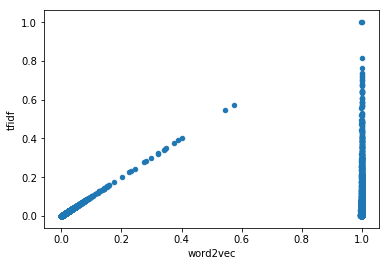

In [103]:
plt.show()

In [ ]:
# Following blocks are records for some observation. <START>
# What's the motivation behind these observation?
#   I am worried about pair-wise vector distance is too small to be negligible

In [70]:


model.most_similar('318')

2017-02-17 20:51:35,729 : INFO : precomputing L2-norms of word weight vectors


[('188', 0.9998799562454224),
 ('8', 0.9998798966407776),
 ('651', 0.9998780488967896),
 ('209', 0.9998772740364075),
 ('131', 0.999876081943512),
 ('47', 0.9998757839202881),
 ('175', 0.9998754858970642),
 ('56', 0.9998741149902344),
 ('510', 0.9998735785484314),
 ('180', 0.9998733401298523)]

In [67]:
help(model.similarity)

Help on method similarity in module gensim.models.word2vec:

similarity(self, w1, w2) method of gensim.models.word2vec.Word2Vec instance



In [75]:
print model.similarity('318', '188')
print model.similarity('188', '318')
model.similarity('318', '8')

0.99988000336
0.99988000336


0.99987988198927014

In [78]:
0.9998798966407776 - 0.99987988198927014

1.4651507451723944e-08

In [79]:
0.9998798966407776 - 0.9998780488967896

1.8477439880371094e-06

In [81]:
model.most_similar('188', topn=1000)

[('95', 0.9998975396156311),
 ('402', 0.9998960494995117),
 ('566', 0.9998918771743774),
 ('67', 0.9998918175697327),
 ('8', 0.9998894333839417),
 ('172', 0.9998888373374939),
 ('23', 0.9998881220817566),
 ('47', 0.999888002872467),
 ('517', 0.9998875260353088),
 ('68', 0.9998874664306641),
 ('241', 0.9998869895935059),
 ('448', 0.9998869299888611),
 ('2', 0.999886691570282),
 ('214', 0.9998856782913208),
 ('692', 0.9998854398727417),
 ('91', 0.9998850226402283),
 ('679', 0.9998847842216492),
 ('554', 0.9998843669891357),
 ('433', 0.999884307384491),
 ('143', 0.999884307384491),
 ('520', 0.9998832941055298),
 ('607', 0.999883234500885),
 ('432', 0.9998831152915955),
 ('506', 0.9998829960823059),
 ('96', 0.9998829364776611),
 ('177', 0.9998822212219238),
 ('22', 0.9998822212219238),
 ('436', 0.9998822212219238),
 ('65', 0.9998821020126343),
 ('736', 0.9998817443847656),
 ('162', 0.9998816847801208),
 ('136', 0.9998816251754761),
 ('367', 0.9998815059661865),
 ('72', 0.9998813271522522),

In [82]:
model['188']

array([ 0.0302143 , -0.07092861, -0.01010368, -0.02060488,  0.04744441,
       -0.15994029, -0.01095068, -0.06109063,  0.05883233,  0.07091606,
       -0.0143349 ,  0.02294626, -0.03202666, -0.08855763,  0.0898365 ,
       -0.07445594, -0.01245529,  0.02912508, -0.01164373, -0.02263123,
        0.0358896 ,  0.07549642, -0.04975729,  0.00797131, -0.02758088,
        0.01896736, -0.10691948, -0.14366432, -0.07112774, -0.06457937,
       -0.01546295, -0.05407744, -0.08774339, -0.0146582 ,  0.01587359,
       -0.05505176,  0.020827  , -0.00142415, -0.02180123,  0.01137353,
        0.05658786,  0.07438951,  0.05878438, -0.00389957, -0.05501007,
       -0.00425949, -0.02599231, -0.09872331, -0.02903808,  0.05057662,
       -0.0166675 ,  0.02234607,  0.098965  ,  0.15753034,  0.03544055,
       -0.12602179, -0.01035366, -0.01687253, -0.1091511 ,  0.10969298,
        0.07014933, -0.12033022, -0.09149399, -0.08334954,  0.05227058,
       -0.01643802, -0.11953379, -0.06535222, -0.08050458,  0.04

In [83]:
model['312']

array([ 0.03019289, -0.07070777, -0.01237752, -0.02033989,  0.04785841,
       -0.16113611, -0.01255183, -0.06203299,  0.05598342,  0.06852031,
       -0.01572939,  0.02392192, -0.03500361, -0.08721248,  0.08870963,
       -0.07689068, -0.01189738,  0.0296757 , -0.01443889, -0.02160097,
        0.0378574 ,  0.0762274 , -0.05106937,  0.00917502, -0.02852504,
        0.01761732, -0.10764904, -0.14538084, -0.06859095, -0.06351066,
       -0.01873809, -0.05372563, -0.08498781, -0.01493019,  0.01742112,
       -0.05367327,  0.02011345, -0.00247258, -0.02229713,  0.01092989,
        0.05332356,  0.07463649,  0.05730992, -0.00238589, -0.05675157,
       -0.00392589, -0.02360465, -0.0996506 , -0.02783269,  0.05065743,
       -0.01578052,  0.02315657,  0.09835292,  0.15682174,  0.03603692,
       -0.12467364, -0.01361743, -0.01768881, -0.11061963,  0.1116775 ,
        0.06881355, -0.11964491, -0.09094244, -0.08356955,  0.05165932,
       -0.01479933, -0.11934063, -0.0644933 , -0.08086962,  0.04

In [ ]:
#<END>